#Introduction


##TEAM BITWISE BRAINS
**CSE445**

**Sec: 08**

**Project:Phase 01**

**Task: Apply data preprocessing**

**Name: Samiul Basir Bhuiyan      ID:2111006642**

**Name: Mohammed Aman Bhuiyan     ID:2131864642**

**Name: Md Sazzad Hossain Adib    ID:2132025642**


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [59]:
df = pd.read_csv('/content/RTA Data 2020 to July 2023.csv')
df.head()

<ipython-input-59-229f29f826be>:1: DtypeWarning: Columns (0,1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/RTA Data 2020 to July 2023.csv')


,EcYear,EcNumber,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,HospitalName,Reason,responsetime,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,2020,31486,12/31/20 22:41,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,BBH,Bike Slip,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,31485,12/31/20 22:25,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,NaN,Car hit Footpath,12.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,31483,12/31/20 21:54,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,BBH,Rickshaw hit with Car,10.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,31482,12/31/20 21:24,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,NaN,Car hit Car and runaway,5.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,31479,12/31/20 21:03,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,NaN,Unknown Bike hit Bike and runaway,5.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
df.shape

(46189, 25)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46189 entries, 0 to 46188
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EcYear                    46189 non-null  object 
 1   EcNumber                  38978 non-null  object 
 2   CallTime                  40233 non-null  object 
 3   EmergencyArea             46189 non-null  object 
 4   TotalPatientsInEmergency  46189 non-null  object 
 5   Gender                    46188 non-null  object 
 6   Age                       46188 non-null  float64
 7   HospitalName              24239 non-null  object 
 8   Reason                    46188 non-null  object 
 9   responsetime              46184 non-null  float64
 10  EducationTitle            46188 non-null  object 
 11  InjuryType                46187 non-null  object 
 12  Cause                     46187 non-null  object 
 13  PatientStatus             46187 non-null  object 
 14  Bicycl

In [62]:
df.isnull().sum()

,0
EcYear,0
EcNumber,7211
CallTime,5956
EmergencyArea,0
TotalPatientsInEmergency,0
Gender,1
Age,1
HospitalName,21950
Reason,1
responsetime,5


**Visualize the percentage of missing values for each column**

<ipython-input-63-8167fea06a43>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_null_percentage.index, y=df_null_percentage.values, palette='magma')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: 

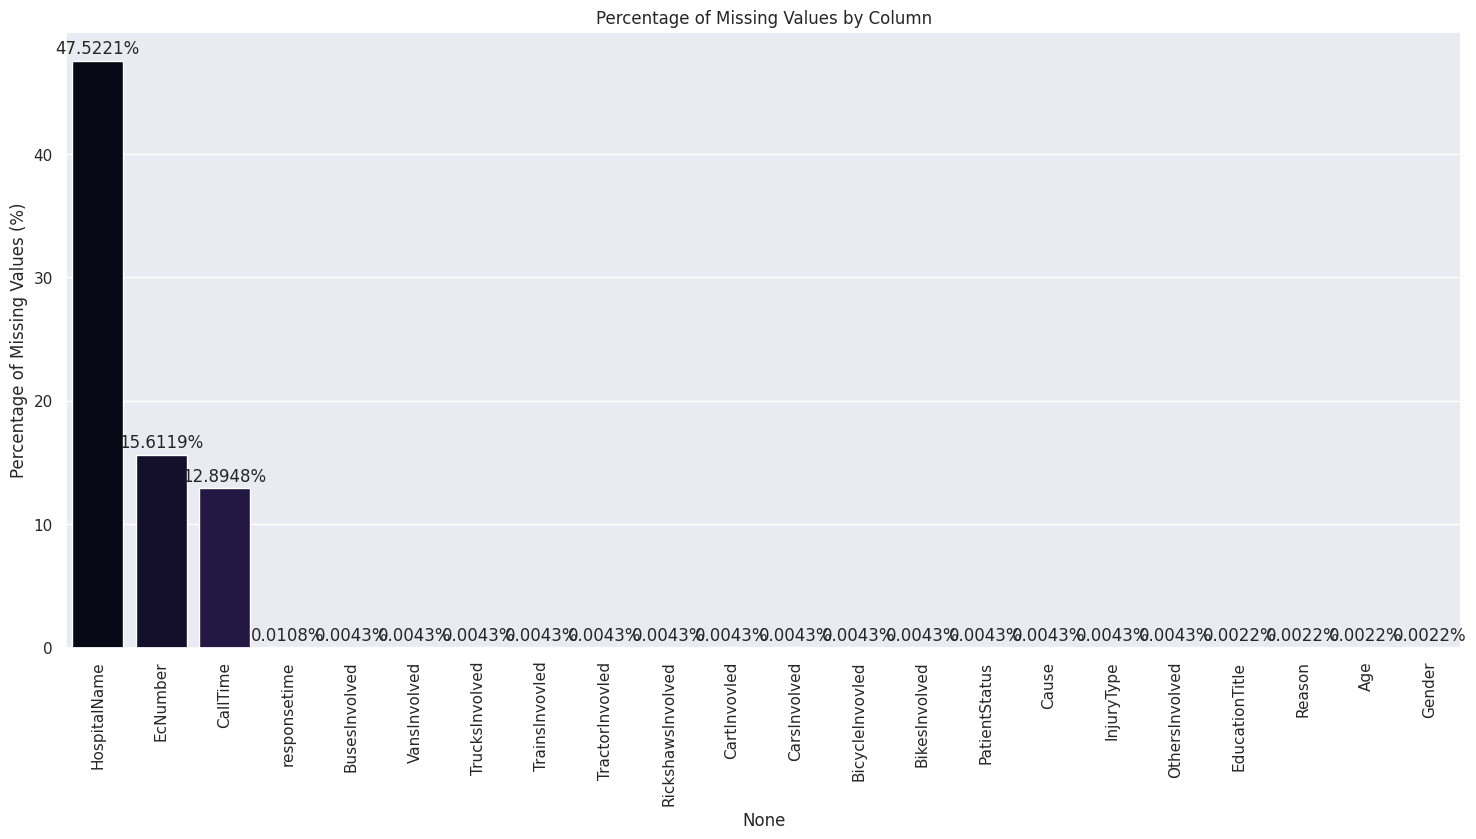

In [63]:
df_null_percentage = (df.isnull().sum() / len(df)) * 100
df_null_percentage = df_null_percentage[df_null_percentage > 0].sort_values(ascending=False)


plt.figure(figsize=(18, 8))
ax = sns.barplot(x=df_null_percentage.index, y=df_null_percentage.values, palette='magma')
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage of Missing Values (%)')

# Adding data labels with more decimal precision
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with non-zero height
        ax.annotate(f'{height:.4f}%',  # Use 4 decimal places
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 9), textcoords='offset points')

plt.show()


#Check Correlation

**Checking correlation between 'CallTime' and 'InjuryType' which show less dependancy between them.**

<ipython-input-64-7f413c7a2463>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_CallTime['CallTime'] = pd.to_datetime(df_CallTime['CallTime'], errors='coerce')  # Convert to datetime
<ipython-input-64-7f413c7a2463>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CallTime['CallTime'] = pd.to_datetime(df_CallTime['CallTime'], errors='coerce')  # Convert to datetime
<ipython-input-64-7f413c7a2463>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

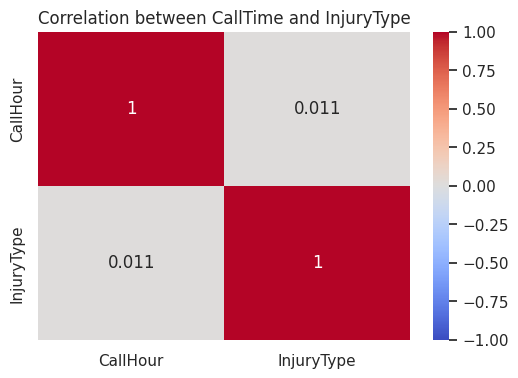

In [64]:
df_CallTime = df[['CallTime', 'InjuryType']]

# Preprocessing CallTime (convert to datetime and extract hour for correlation)
df_CallTime['CallTime'] = pd.to_datetime(df_CallTime['CallTime'], errors='coerce')  # Convert to datetime
df_CallTime['CallHour'] = df_CallTime['CallTime'].dt.hour  # Extract hour

# Encoding InjuryType as a numerical value
df_CallTime['InjuryType'] = df_CallTime['InjuryType'].astype('category').cat.codes

# Handle missing values (if necessary)
df_CallTime.dropna(inplace=True)

# Calculate correlation between CallHour and InjuryType
correlation = df_CallTime[['CallHour', 'InjuryType']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between CallTime and InjuryType')
plt.show()

**Checking correlation between 'EcYear' and 'InjuryType' which show less dependancy between them.**

<ipython-input-65-c202b63a4360>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_EcYear['EcYear'] = df_EcYear['EcYear'].astype('category').cat.codes
<ipython-input-65-c202b63a4360>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_EcYear['InjuryType'] = df_EcYear['InjuryType'].astype('category').cat.codes
<ipython-input-65-c202b63a4360>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

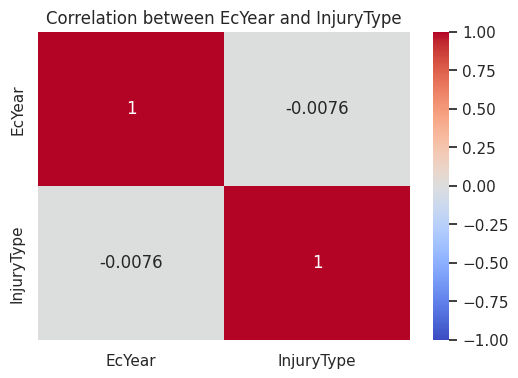

In [65]:
df_EcYear = df[['EcYear', 'InjuryType']]

# Encoding EcYear as a numerical value (2022 -> 0, 2023 -> 1, 2024 -> 2)
df_EcYear['EcYear'] = df_EcYear['EcYear'].astype('category').cat.codes

# Encoding InjuryType as a numerical value
df_EcYear['InjuryType'] = df_EcYear['InjuryType'].astype('category').cat.codes

# Handle missing values (if necessary)
df_EcYear.dropna(inplace=True)

# Calculate correlation between EcYear and InjuryType
correlation = df_EcYear[['EcYear', 'InjuryType']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between EcYear and InjuryType')
plt.show()

# Data Cleaning

**Dropped 'HospitalName','EcNumber','CallTime','EcYear'**

1. Drop the HospitalName & EcNumber coloumn as it is less important and have huge NULL values
2. By analysing the dataset the values of EcYear & CallTime has less relation to Target variable 'InjuryType'

In [66]:
df.drop(['HospitalName','EcNumber','CallTime','EcYear'], axis=1, inplace=True)

**Dropped rows which has 2 or less NULL values**

In [67]:
df = df.dropna(thresh=len(df.columns) - 2)

**Fill 'responsetime' columns NaN values with Mean**

In [68]:
mean_responsetime = int(df['responsetime'].mean())
df['responsetime'].fillna(mean_responsetime, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46187 entries, 0 to 46188
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46187 non-null  object 
 1   TotalPatientsInEmergency  46187 non-null  object 
 2   Gender                    46187 non-null  object 
 3   Age                       46187 non-null  float64
 4   Reason                    46187 non-null  object 
 5   responsetime              46187 non-null  float64
 6   EducationTitle            46187 non-null  object 
 7   InjuryType                46187 non-null  object 
 8   Cause                     46187 non-null  object 
 9   PatientStatus             46187 non-null  object 
 10  BicycleInvovled           46187 non-null  float64
 11  BikesInvolved             46187 non-null  float64
 12  BusesInvolved             46187 non-null  float64
 13  CarsInvolved              46187 non-null  float64
 14  CartInvovle

<ipython-input-68-1d70ce1c68f0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['responsetime'].fillna(mean_responsetime, inplace=True)
<ipython-input-68-1d70ce1c68f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['responsetime'].fillna(mean_responsetime, inplace=True)


In [69]:
df.isnull().sum()

,0
EmergencyArea,0
TotalPatientsInEmergency,0
Gender,0
Age,0
Reason,0
responsetime,0
EducationTitle,0
InjuryType,0
Cause,0
PatientStatus,0


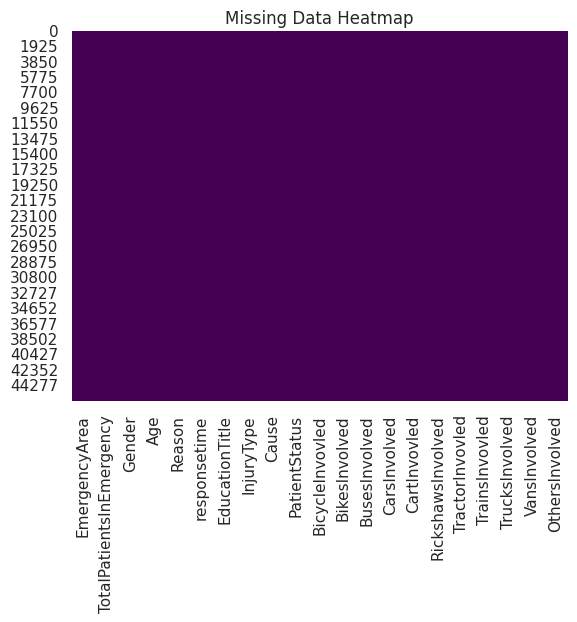

In [70]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [71]:
df.shape

(46187, 21)

**Dropping duplicate coloumns**

In [72]:
df = df.drop_duplicates()
df.shape

(46159, 21)

In [73]:
df['TotalPatientsInEmergency'] = df['TotalPatientsInEmergency'].astype('float64')

<ipython-input-73-86f18bb0612b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPatientsInEmergency'] = df['TotalPatientsInEmergency'].astype('float64')


#Encoding Categorical Features

### Emergency Area encoded with Label Encoding.

In [74]:
le = LabelEncoder()
df['EmergencyArea'] = le.fit_transform(df['EmergencyArea'])
df['EmergencyArea']

,EmergencyArea
0,24929
1,18187
2,24347
3,15514
4,34419
...,...
46184,17382
46185,10603
46186,22077
46187,1181


###Gender encoded with One Hot Encoding.

In [75]:
encoder = OneHotEncoder(sparse_output=False)
arr = encoder.fit_transform(df[['Gender']])

en_df = pd.DataFrame(arr, columns=encoder.categories_[0])

en_df.index = df.index

df = pd.concat([df, en_df], axis=1)
df.drop(['Gender'], axis=1, inplace=True)


<ipython-input-76-beccb475d14e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_percentage.index, y=gender_percentage.values, palette=gender_colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: W

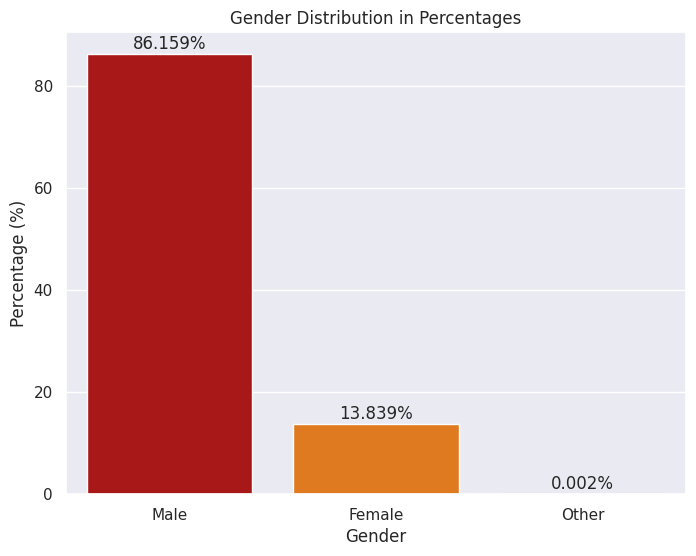

In [76]:
total_entries_gender = len(df)

gender_percentage = (df[["Male", "Female", "Other"]].sum() / total_entries_gender) * 100

gender_colors = ['#c10000', '#ff7800','#1330bf']


plt.figure(figsize=(8, 6))
sns.barplot(x=gender_percentage.index, y=gender_percentage.values, palette=gender_colors)


for i, val in enumerate(gender_percentage.values):
    plt.text(i, val + 1, f'{val:.3f}%', ha='center', fontsize=12)

plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.title('Gender Distribution in Percentages')

plt.show()

###Reason encoded with Label Encoding.

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Reason'] = le.fit_transform(df['Reason'])
df['Reason']

,Reason
0,11684
1,15523
2,19244
3,15492
4,20810
...,...
46184,9349
46185,4413
46186,18909
46187,4263


###Education Title encoded with Ordinal Encoding.

In [78]:
edu_order = [['Illetrate','Primary', 'Matric','Middle','Intermediate','Graduation','Masters','PHD']]

ordinal_encoder = OrdinalEncoder(categories=edu_order)

df['EducationTitle_Ordinal'] = ordinal_encoder.fit_transform(df[['EducationTitle']])

df.drop(['EducationTitle'], axis=1, inplace=True)


###Injury Type encoded with Ordinal Encoding.

In [79]:
injury_order = [['Minor','Single Fracture', 'Multiple Fractures','Spinal Injury','Head Injury']]

ordinal_encoder = OrdinalEncoder(categories=injury_order)

df['InjuryType_Ordinal'] = ordinal_encoder.fit_transform(df[['InjuryType']])

df.drop(['InjuryType'], axis=1, inplace=True)


<ipython-input-80-3483d2543e54>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=injury_labels, order=injury_order[0], palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with

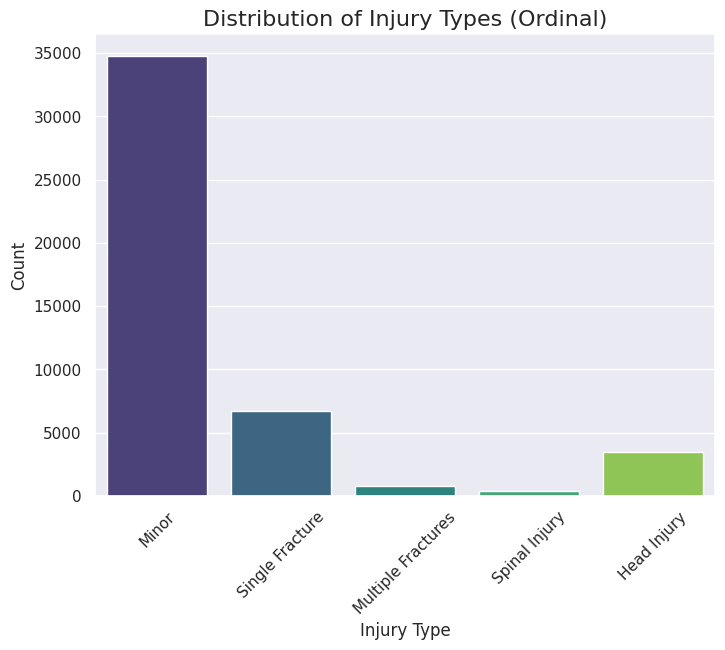

In [80]:
injury_mapping = {0: 'Minor', 1: 'Single Fracture', 2: 'Multiple Fractures',
                  3: 'Spinal Injury', 4: 'Head Injury'}

encoded_values = df['InjuryType_Ordinal']

injury_labels = [injury_mapping[val] for val in encoded_values]

plt.figure(figsize=(8, 6))
sns.countplot(x=injury_labels, order=injury_order[0], palette='viridis')

plt.title('Distribution of Injury Types (Ordinal)', fontsize=16)
plt.xlabel('Injury Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45)
plt.show()

###Cause encoded with Label Encoding.

In [81]:
le = LabelEncoder()
df['Cause'] = le.fit_transform(df['Cause'])

###PatientStatus encoded with One Hot Encoding

In [82]:
encoder = OneHotEncoder(sparse_output=False)
arr = encoder.fit_transform(df[['PatientStatus']])

en_df = pd.DataFrame(arr, columns=encoder.categories_[0])

en_df.index = df.index

df = pd.concat([df, en_df], axis=1)
df.drop(['PatientStatus'], axis=1, inplace=True)


<ipython-input-83-8d3eb4a53023>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_percentage.index, y=status_percentage.values, palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gro

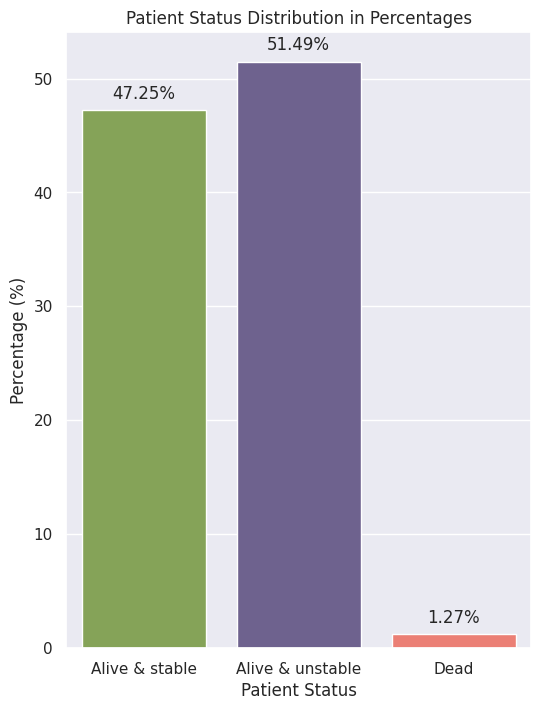

In [83]:
total_entries = len(df)

status_percentage = (df[[ "Alive & stable", "Alive & unstable","Dead"]].sum() / total_entries) * 100

colors = ['#88B04B', '#6B5B95', '#FF6F61']

plt.figure(figsize=(6,8))
sns.barplot(x=status_percentage.index, y=status_percentage.values, palette=colors)

for i, val in enumerate(status_percentage.values):
    plt.text(i, val + 1, f'{val:.2f}%', ha='center', fontsize=12)

plt.xlabel('Patient Status')
plt.ylabel('Percentage (%)')
plt.title('Patient Status Distribution in Percentages')

plt.show()

In [84]:
df.head(10)

,EmergencyArea,TotalPatientsInEmergency,Age,Reason,responsetime,Cause,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,...,VansInvolved,OthersInvolved,Female,Male,Other,EducationTitle_Ordinal,InjuryType_Ordinal,Alive & stable,Alive & unstable,Dead
0,24929,1.0,27.0,11684,10.0,3,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0
1,18187,1.0,20.0,15523,12.0,3,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,24347,1.0,48.0,19244,10.0,3,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,15514,1.0,45.0,15492,5.0,3,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0
4,34419,1.0,22.0,20810,5.0,3,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0
5,12307,1.0,50.0,12331,6.0,3,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0
6,17796,1.0,18.0,11684,5.0,3,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.0,4.0,0.0,1.0,0.0
7,12675,1.0,25.0,17738,4.0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
8,27933,1.0,18.0,11744,4.0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0
9,19578,1.0,19.0,19131,3.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46159 entries, 0 to 46188
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46159 non-null  int64  
 1   TotalPatientsInEmergency  46159 non-null  float64
 2   Age                       46159 non-null  float64
 3   Reason                    46159 non-null  int64  
 4   responsetime              46159 non-null  float64
 5   Cause                     46159 non-null  int64  
 6   BicycleInvovled           46159 non-null  float64
 7   BikesInvolved             46159 non-null  float64
 8   BusesInvolved             46159 non-null  float64
 9   CarsInvolved              46159 non-null  float64
 10  CartInvovled              46159 non-null  float64
 11  RickshawsInvolved         46159 non-null  float64
 12  TractorInvovled           46159 non-null  float64
 13  TrainsInvovled            46159 non-null  float64
 14  TrucksInvol

#Outlier Remove

###Draw Box polt

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='responsetime'>

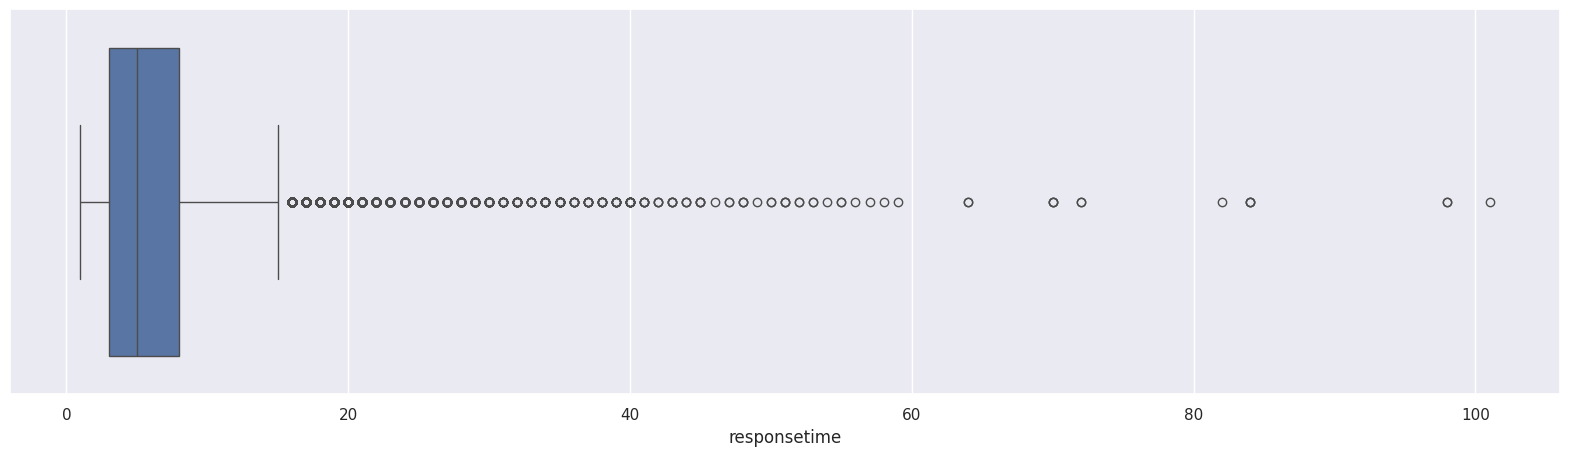

In [86]:
plt.figure(figsize=(20,5))
sns.boxplot(x= df['responsetime'])

In [87]:
x = 'responsetime'
min = df[x].min()
max = df[x].max()

q1=df[x].quantile(0.25)
q2=df[x].quantile(0.50)
q3=df[x].quantile(0.75)
IQR =q3 - q1


min_range = q1 - 1.5*IQR
max_range = q3 + 1.5*IQR

min , max , q1, q2, q3, IQR, min_range, max_range

(1.0, 101.0, 3.0, 5.0, 8.0, 5.0, -4.5, 15.5)

In [88]:
df.shape

(46159, 25)

In [89]:
df = df[df['responsetime'] < max_range]
df.shape

(43894, 25)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='responsetime'>

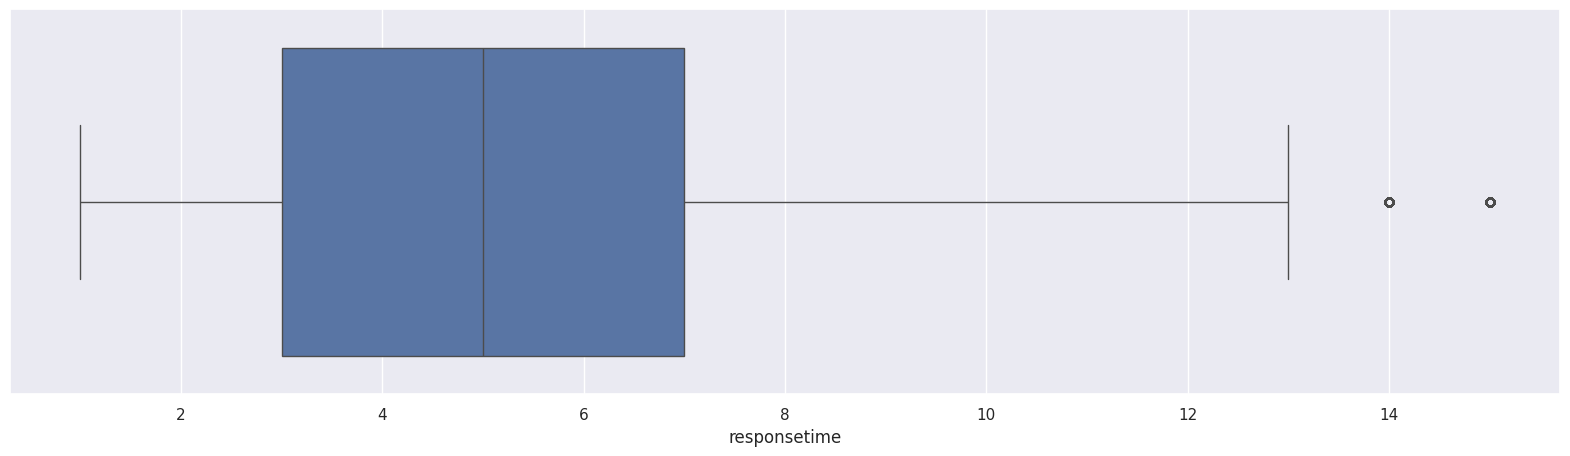

In [90]:
plt.figure(figsize=(20,5))
sns.boxplot(x= df['responsetime'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Age'>

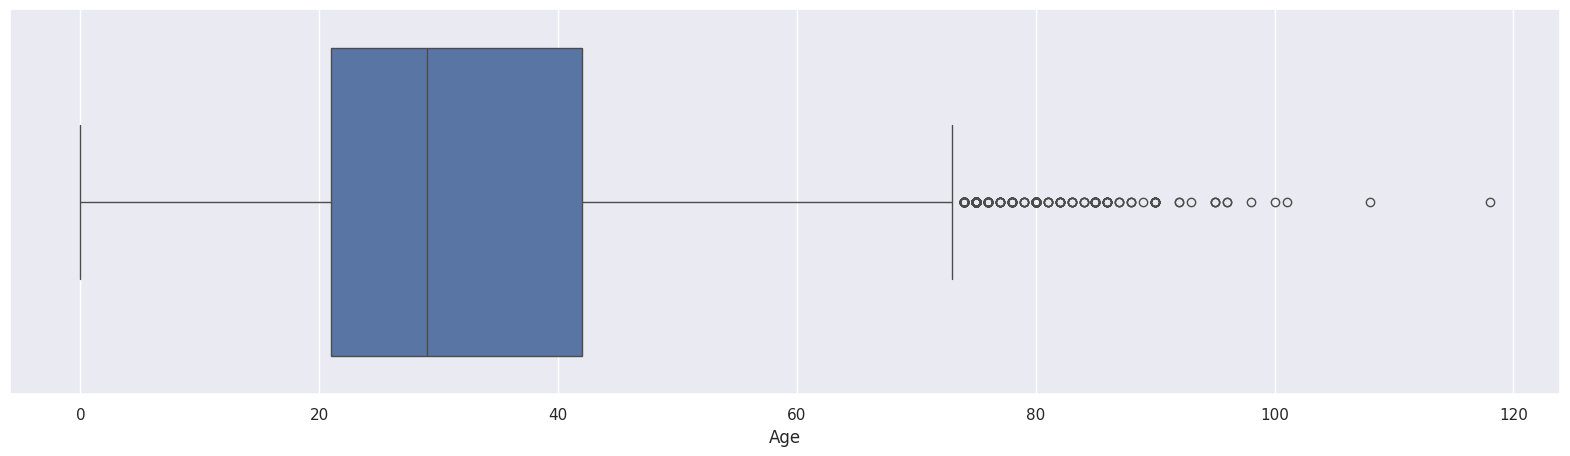

In [91]:
plt.figure(figsize=(20,5))
sns.boxplot(x= df['Age'])

In [92]:
x = 'Age'
min = df[x].min()
max = df[x].max()

q1=df[x].quantile(0.25)
q2=df[x].quantile(0.50)
q3=df[x].quantile(0.75)
IQR =q3 - q1


min_range = q1 - 1.5*IQR
max_range = q3 + 1.5*IQR

min , max , q1, q2, q3, IQR, min_range, max_range

(0.0, 118.0, 21.0, 29.0, 42.0, 21.0, -10.5, 73.5)

In [93]:
df.shape

(43894, 25)

In [94]:
df = df[df['Age'] < max_range]
df.shape

(43453, 25)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Age'>

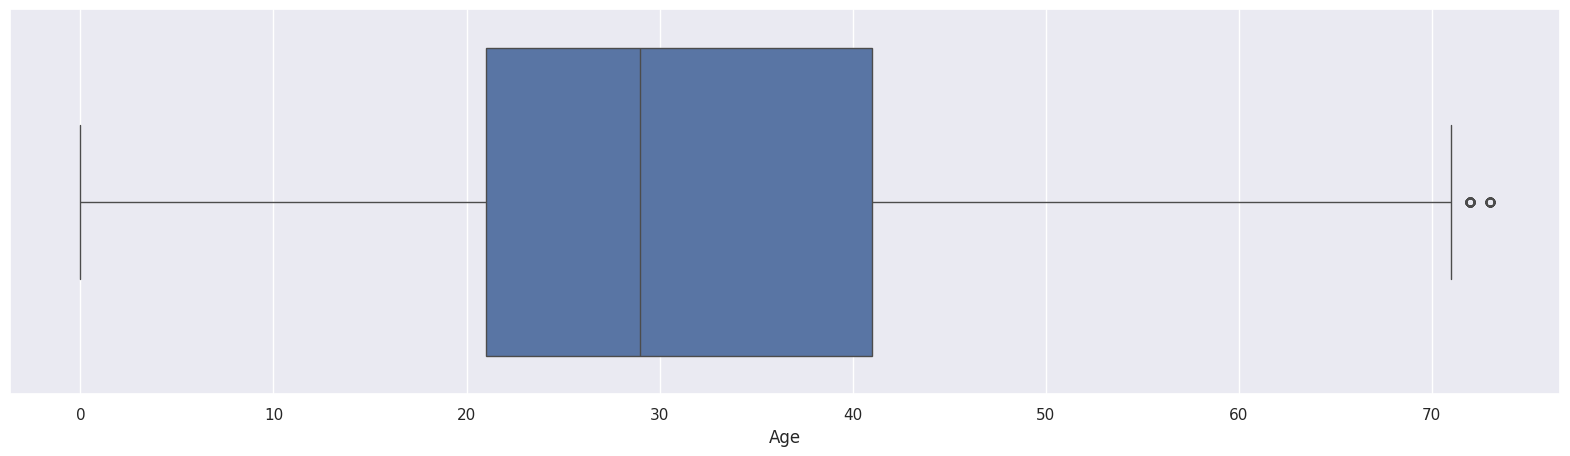

In [95]:
plt.figure(figsize=(20,5))
sns.boxplot(x= df['Age'])

#Applying Mean Normalization for Feature Scaling

###Normalization for Reason

<Axes: xlabel='InjuryType_Ordinal', ylabel='Reason'>

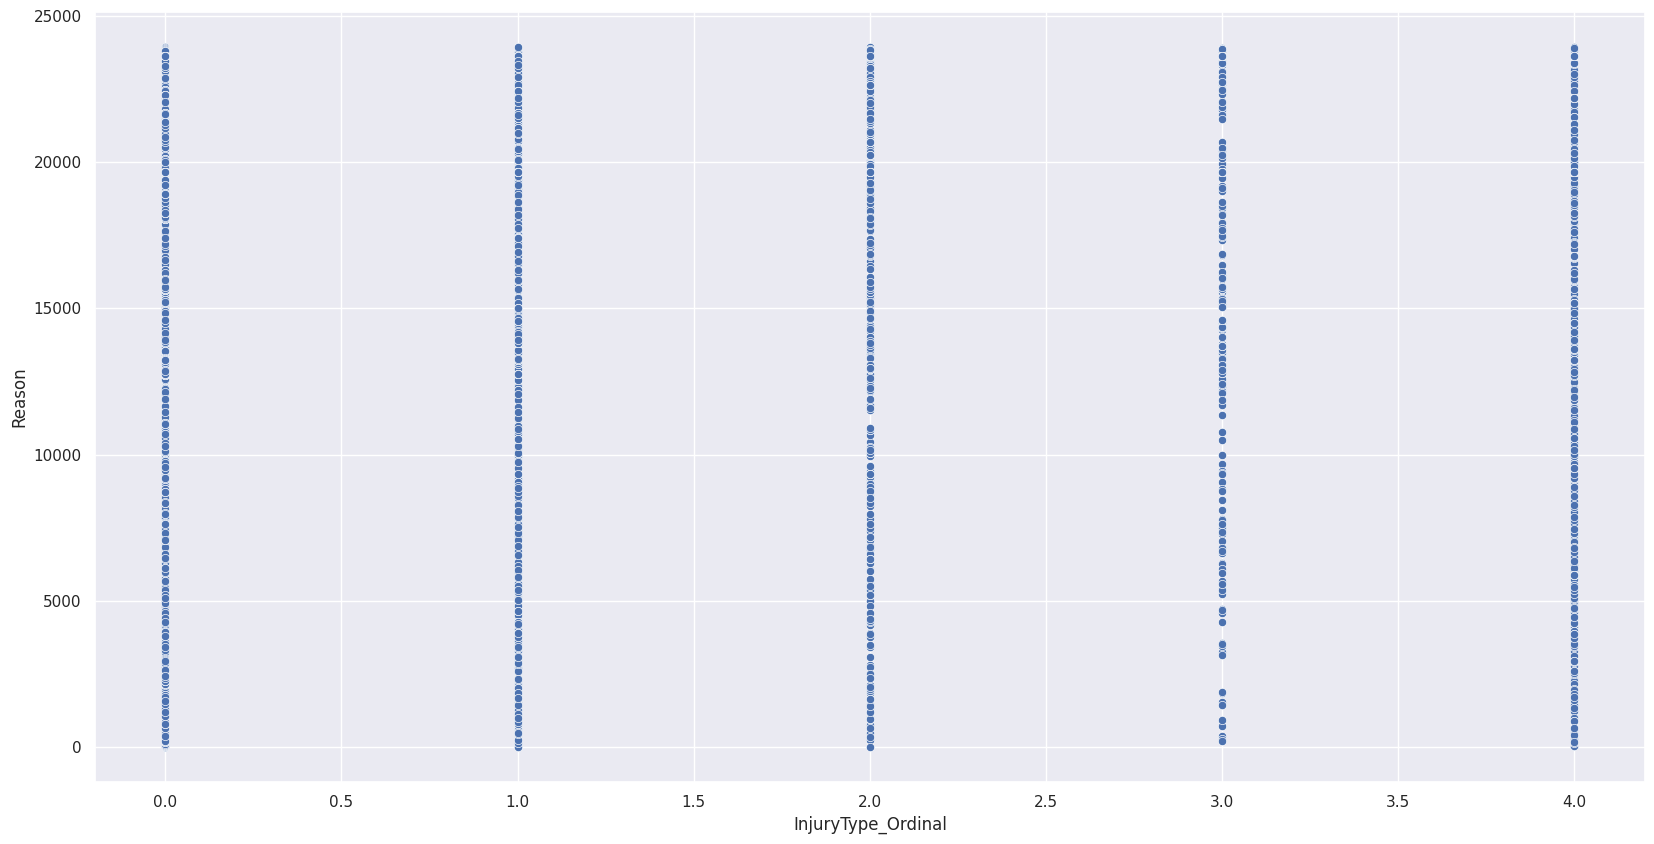

In [96]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['InjuryType_Ordinal'], y=df['Reason'])

In [97]:
df['Reason']  = (df['Reason'] - df['Reason'].mean())/df['Reason'].max()

<Axes: xlabel='InjuryType_Ordinal', ylabel='Reason'>

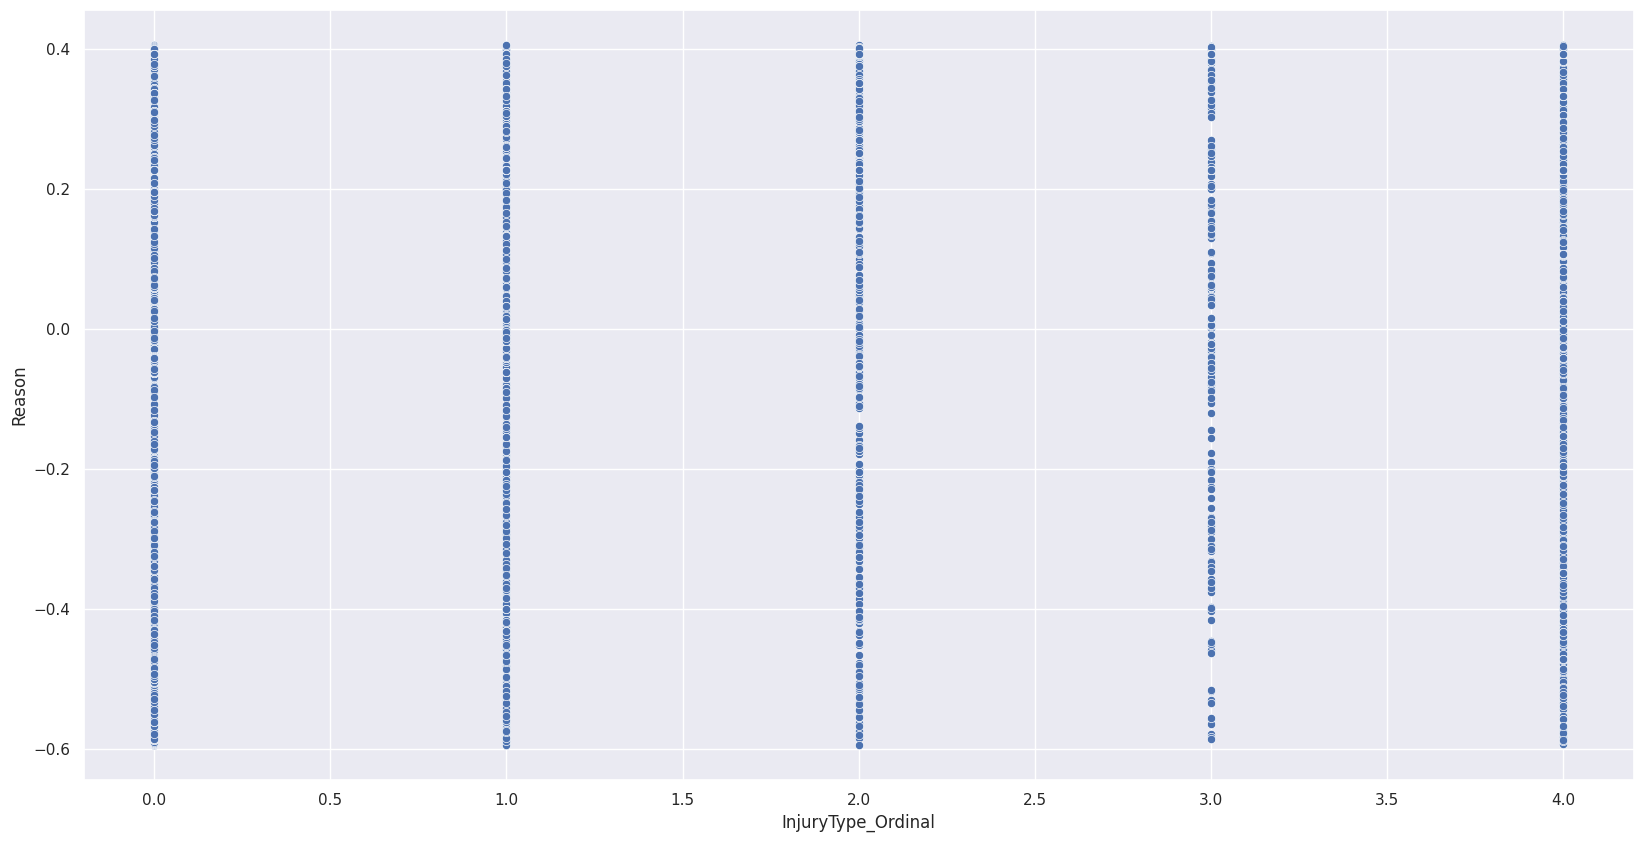

In [98]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['InjuryType_Ordinal'], y=df['Reason'])

###Normalization for Emergency Area

<Axes: xlabel='InjuryType_Ordinal', ylabel='EmergencyArea'>

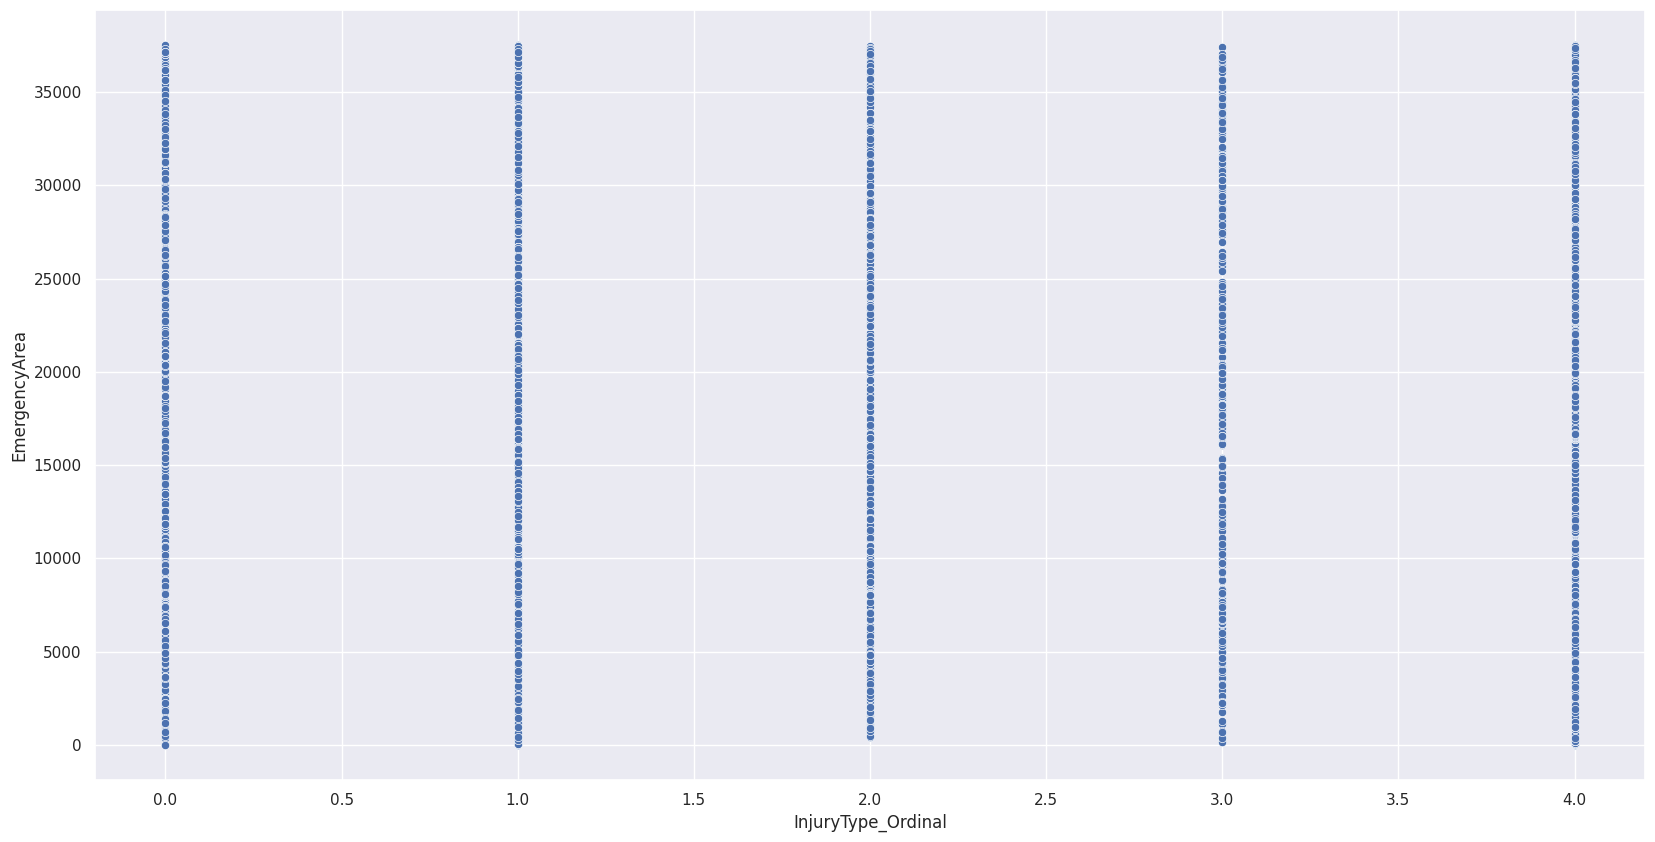

In [99]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['InjuryType_Ordinal'], y=df['EmergencyArea'])

In [100]:
df['EmergencyArea']  = (df['EmergencyArea'] - df['EmergencyArea'].mean())/df['EmergencyArea'].max()

<Axes: xlabel='InjuryType_Ordinal', ylabel='EmergencyArea'>

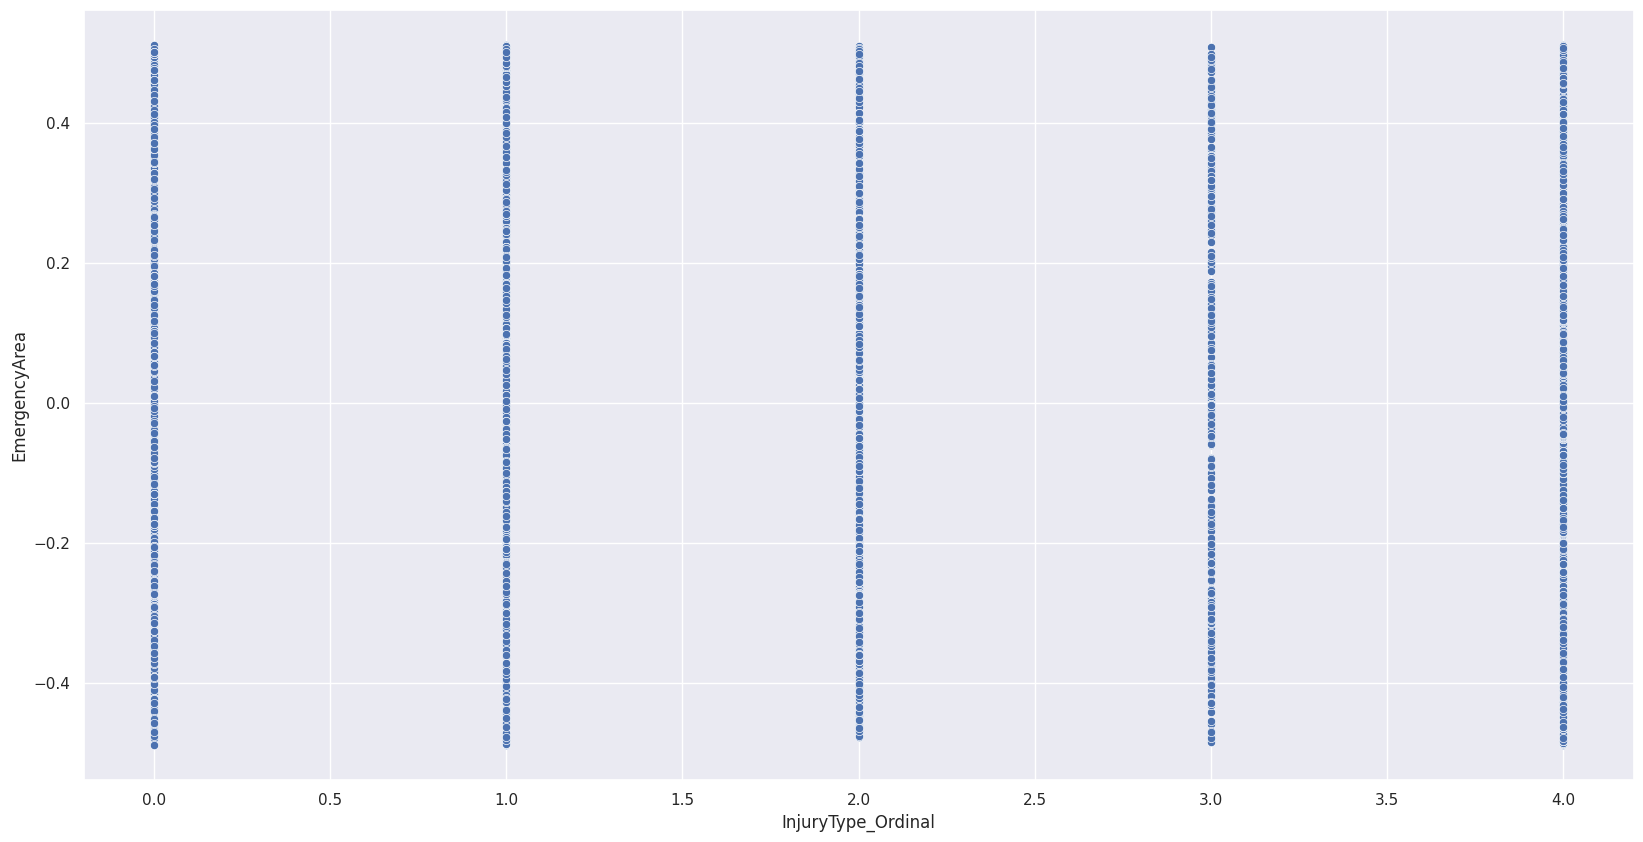

In [101]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['InjuryType_Ordinal'], y=df['EmergencyArea'])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

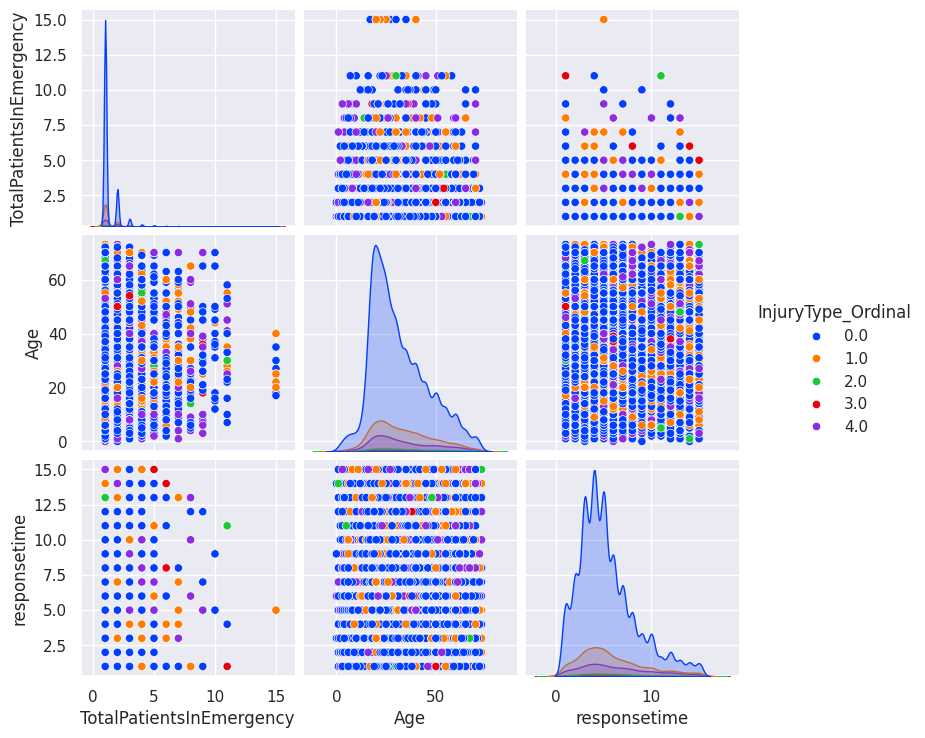

In [102]:
# Select relevant features for pairplot
sns.pairplot(df[['InjuryType_Ordinal', 'TotalPatientsInEmergency', 'Age', 'responsetime']], hue='InjuryType_Ordinal', palette='bright')
plt.show()


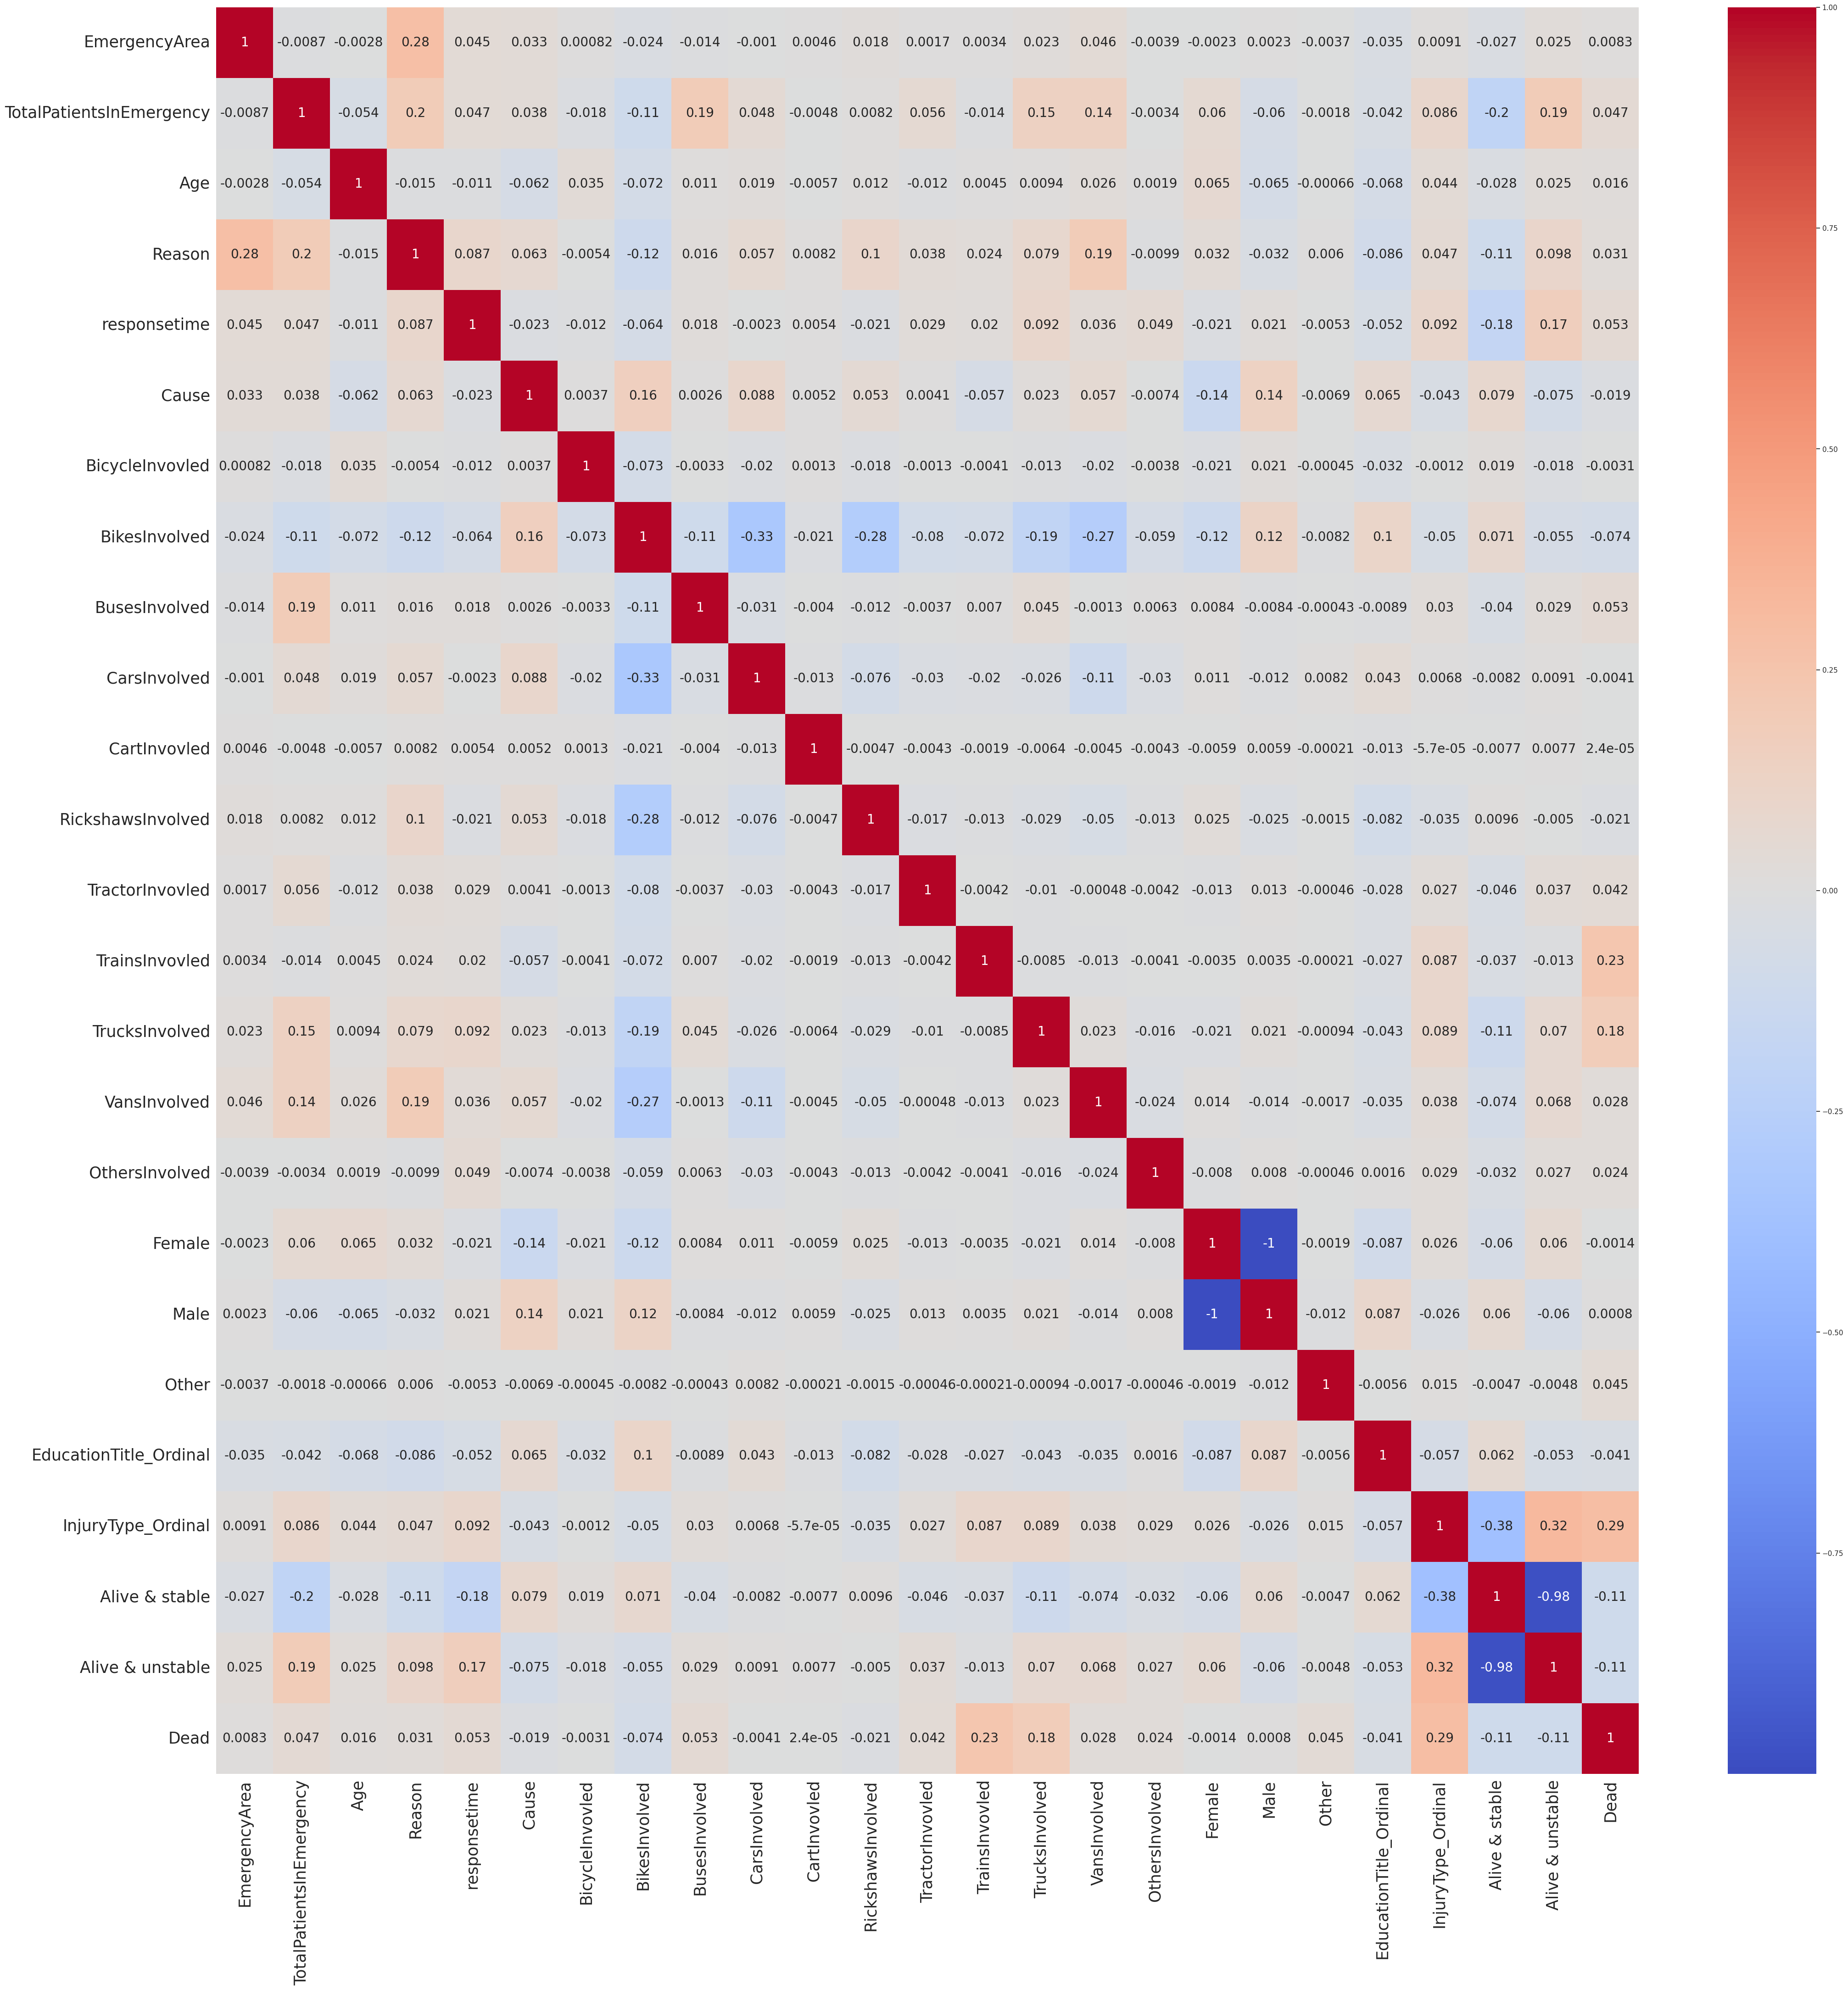

In [103]:
numeric_df = df.select_dtypes(include=[np.number])

sns.set(font_scale=1)
plt.subplots(figsize=(50, 50))

heat_plot = sns.heatmap(numeric_df.corr(method='pearson'), annot=True, cmap='coolwarm', annot_kws={'size': 20})

plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

plt.show()

#Data Partitioning: Implementing Train-Test Split

In [104]:
X = df.drop(columns=['InjuryType_Ordinal'])

y = df['InjuryType_Ordinal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34762, 24)
X_test shape: (8691, 24)
y_train shape: (34762,)
y_test shape: (8691,)
